<a href="https://colab.research.google.com/github/LatifaAlnaim1996/FinalProject/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yellow taxi NYC ( Jan-2010 ) :::**

====================================================================================================

### **-- Table of Contents --**
<ul>
<li><a href="#importing">Importing Dataset </a></li>
<li><a href="#EDA">EDA </a></li>
<li><a href="#Analyzing">Data Analyzing </a></li>
<li><a href="#Modeling ">Modeling</a></li>
</ul>


====================================================================================================









## **- Importing Dataset ::**

In [43]:
%%capture
!pip install category-encoders
import category_encoders as ce
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import time
import sys
import json
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [44]:
df2 = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/nyc_transport/taxi/yellow_tripdata_2010-01.csv')


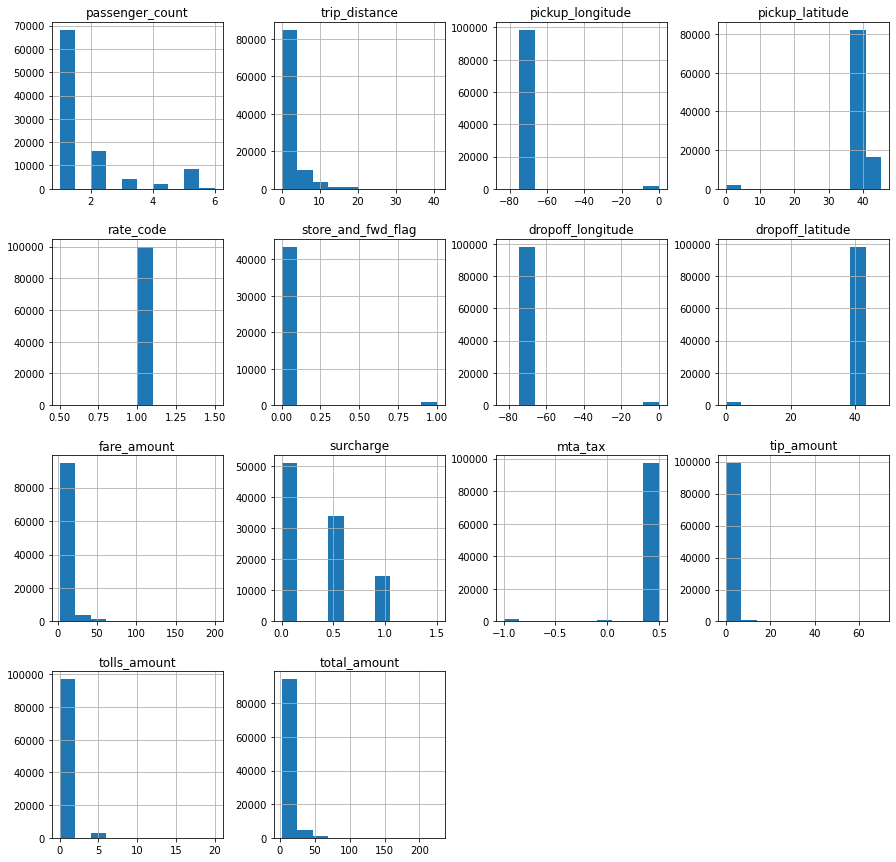

In [45]:
df2.hist(figsize=(15, 15))

plt.show();


## **- EDA ::**

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           100000 non-null  object 
 1   pickup_datetime     100000 non-null  object 
 2   dropoff_datetime    100000 non-null  object 
 3   passenger_count     100000 non-null  int64  
 4   trip_distance       100000 non-null  float64
 5   pickup_longitude    100000 non-null  float64
 6   pickup_latitude     100000 non-null  float64
 7   rate_code           100000 non-null  int64  
 8   store_and_fwd_flag  44362 non-null   float64
 9   dropoff_longitude   100000 non-null  float64
 10  dropoff_latitude    100000 non-null  float64
 11  payment_type        100000 non-null  object 
 12  fare_amount         100000 non-null  float64
 13  surcharge           100000 non-null  float64
 14  mta_tax             100000 non-null  float64
 15  tip_amount          100000 non-null

In [47]:
df2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2010-01-19 23:36:48,2010-01-19 23:53:45,1,5.20,-73.990080,40.756992,1,0.0,-73.925557,40.767909,Cas,14.9,0.5,0.5,0.0,0.0,15.9
1,CMT,2010-01-17 23:42:41,2010-01-17 23:47:21,2,0.90,-73.969712,40.756908,1,0.0,-73.976511,40.764678,Cas,4.9,0.5,0.5,0.0,0.0,5.9
2,DDS,2010-01-07 17:14:24,2010-01-07 17:32:49,1,3.10,-73.990600,40.724730,1,NaN,-73.940253,40.848625,CAS,2.5,1.0,-1.0,0.0,0.0,4.0
3,VTS,2010-01-23 19:09:00,2010-01-23 19:21:00,1,1.57,-74.002070,40.745468,1,NaN,-73.992803,40.730730,Cre,7.7,0.0,0.5,1.4,0.0,9.6
4,VTS,2010-01-25 21:30:00,2010-01-25 21:34:00,2,0.74,-74.005705,40.740440,1,NaN,-73.996923,40.744078,Cre,4.1,0.5,0.5,2.0,0.0,7.1


In [48]:
df2.tail()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
99995,CMT,2010-01-20 08:48:30,2010-01-20 09:10:47,1,4.00,-73.955038,40.769033,1,0.0,-73.994550,40.745416,Cas,14.5,0.0,0.5,0.0,0.0,15.0
99996,VTS,2010-01-17 12:00:00,2010-01-17 12:11:00,1,1.71,-73.979643,40.786230,1,NaN,-73.955647,40.774368,CAS,7.7,0.0,0.5,0.0,0.0,8.2
99997,DDS,2010-01-05 19:36:48,2010-01-05 19:45:54,3,2.10,-73.958252,40.774580,1,NaN,-73.970823,40.750803,CRE,7.3,1.0,-1.0,2.2,0.0,11.0
99998,VTS,2010-01-12 14:03:00,2010-01-12 14:11:00,1,1.29,-73.982860,40.774730,1,NaN,-73.982515,40.767615,CAS,6.1,0.0,0.5,0.0,0.0,6.6
99999,CMT,2010-01-24 13:00:00,2010-01-24 13:02:24,3,0.50,-73.974854,40.792871,1,0.0,-73.969642,40.800173,Cas,3.7,0.0,0.5,0.0,0.0,4.2


In [49]:
df2.isnull().sum()

vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
rate_code                 0
store_and_fwd_flag    55638
dropoff_longitude         0
dropoff_latitude          0
payment_type              0
fare_amount               0
surcharge                 0
mta_tax                   0
tip_amount                0
tolls_amount              0
total_amount              0
dtype: int64

In [50]:
df2.dropna(inplace=True)

In [51]:
df2.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
rate_code             0
store_and_fwd_flag    0
dropoff_longitude     0
dropoff_latitude      0
payment_type          0
fare_amount           0
surcharge             0
mta_tax               0
tip_amount            0
tolls_amount          0
total_amount          0
dtype: int64

In [52]:
df2.passenger_count.value_counts()

1    34461
2     7109
3     1773
4      988
5       31
Name: passenger_count, dtype: int64

In [53]:
len(df2)

44362

In [54]:
df2.shape

(44362, 18)

In [55]:
np.sum(df2.isna())

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
rate_code             0
store_and_fwd_flag    0
dropoff_longitude     0
dropoff_latitude      0
payment_type          0
fare_amount           0
surcharge             0
mta_tax               0
tip_amount            0
tolls_amount          0
total_amount          0
dtype: int64

In [56]:
df2.corr()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
passenger_count,1.000000,0.027729,0.006435,-0.006700,NaN,0.003439,0.005852,-0.006020,0.031960,0.026212,0.003717,-0.040111,0.015306,0.023560
trip_distance,0.027729,1.000000,0.005419,-0.005047,NaN,0.008769,0.005836,-0.005479,0.918100,-0.003359,-0.090614,0.406990,0.527198,0.905635
pickup_longitude,0.006435,0.005419,1.000000,-0.999963,NaN,0.010333,0.992959,-0.992940,0.004469,0.004369,0.004937,0.002101,-0.000180,0.004336
pickup_latitude,-0.006700,-0.005047,-0.999963,1.000000,NaN,-0.010371,-0.992951,0.992958,-0.004129,-0.004761,-0.004919,-0.001844,0.001090,-0.003930
rate_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,0.003439,0.008769,0.010333,-0.010371,NaN,1.000000,0.011996,-0.012119,0.010816,0.006733,-0.005034,0.004330,0.000017,0.010213
dropoff_longitude,0.005852,0.005836,0.992959,-0.992951,NaN,0.011996,1.000000,-0.999967,0.004579,0.004183,0.005209,0.001468,-0.000301,0.004308
dropoff_latitude,-0.006020,-0.005479,-0.992940,0.992958,NaN,-0.012119,-0.999967,1.000000,-0.004439,-0.004350,-0.004706,-0.001606,0.000798,-0.004167
fare_amount,0.031960,0.918100,0.004469,-0.004129,NaN,0.010816,0.004579,-0.004439,1.000000,-0.024635,-0.227227,0.459649,0.526711,0.982881
surcharge,0.026212,-0.003359,0.004369,-0.004761,NaN,0.006733,0.004183,-0.004350,-0.024635,1.000000,-0.002673,0.007440,-0.040076,0.020342


In [57]:
df2.passenger_count.unique()

array([1, 2, 4, 3, 5])

In [58]:
df2.tail(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
99975,CMT,2010-01-04 21:15:24,2010-01-04 21:19:25,1,0.7,-73.993784,40.725666,1,0.0,-73.994079,40.732506,Cas,4.5,0.5,0.5,0.00,0.0,5.50
99976,CMT,2010-01-23 02:21:25,2010-01-23 02:24:35,1,0.9,-73.999121,40.744470,1,0.0,-73.993215,40.752728,Cas,4.5,0.5,0.5,0.00,0.0,5.50
99978,CMT,2010-01-21 20:02:16,2010-01-21 20:19:38,1,2.4,-73.976841,40.750771,1,0.0,-74.008195,40.748743,Cas,11.3,1.0,0.5,0.00,0.0,12.80
99979,CMT,2010-01-10 01:57:01,2010-01-10 02:09:28,1,3.7,-74.001533,40.731060,1,0.0,-73.977827,40.776179,Cas,11.3,0.5,0.5,0.00,0.0,12.30
99983,CMT,2010-01-14 15:42:25,2010-01-14 15:42:37,1,0.0,-73.981593,40.770394,1,0.0,-73.981593,40.770394,Cas,45.0,0.0,0.5,0.00,0.0,45.50
99989,CMT,2010-01-20 22:30:41,2010-01-20 22:39:00,1,2.5,-74.003259,40.727016,1,0.0,-73.978214,40.752484,Cre,8.1,0.5,0.5,1.00,0.0,10.10
99992,CMT,2010-01-17 18:35:37,2010-01-17 18:38:22,3,0.7,-73.975697,40.789520,1,0.0,-73.981661,40.780491,Cre,4.1,0.0,0.5,0.92,0.0,5.52
99993,CMT,2010-01-11 23:31:48,2010-01-11 23:40:39,4,1.8,-73.982032,40.772246,1,0.0,-73.973477,40.756954,Cas,7.3,0.5,0.5,0.00,0.0,8.30
99995,CMT,2010-01-20 08:48:30,2010-01-20 09:10:47,1,4.0,-73.955038,40.769033,1,0.0,-73.994550,40.745416,Cas,14.5,0.0,0.5,0.00,0.0,15.00
99999,CMT,2010-01-24 13:00:00,2010-01-24 13:02:24,3,0.5,-73.974854,40.792871,1,0.0,-73.969642,40.800173,Cas,3.7,0.0,0.5,0.00,0.0,4.20


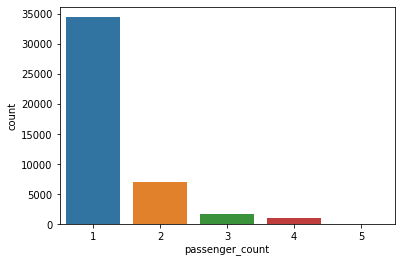

In [59]:
import seaborn as sns
sns.countplot(x = 'passenger_count', data = df2);

In [60]:
df2['pickup_datetime'] = df2['pickup_datetime'].map(pd.to_datetime)

In [61]:
df2['year'] = df2['pickup_datetime'].dt.year
df2['month'] = df2['pickup_datetime'].dt.month
df2['day'] = df2['pickup_datetime'].dt.day
df2['hour']=df2['pickup_datetime'].dt.hour
df2['weekday']=df2['pickup_datetime'].dt.day_name()

In [62]:
df2.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,year,month,day,hour,weekday
0,CMT,2010-01-19 23:36:48,2010-01-19 23:53:45,1,5.2,-73.990080,40.756992,1,0.0,-73.925557,40.767909,Cas,14.9,0.5,0.5,0.00,0.0,15.90,2010,1,19,23,Tuesday
1,CMT,2010-01-17 23:42:41,2010-01-17 23:47:21,2,0.9,-73.969712,40.756908,1,0.0,-73.976511,40.764678,Cas,4.9,0.5,0.5,0.00,0.0,5.90,2010,1,17,23,Sunday
5,CMT,2010-01-25 07:06:52,2010-01-25 07:12:36,1,1.2,-73.952352,40.768764,1,0.0,-73.967726,40.763057,Cas,5.7,0.0,0.5,0.00,0.0,6.20,2010,1,25,7,Monday
10,CMT,2010-01-27 22:58:03,2010-01-27 23:02:38,2,0.7,-74.007234,40.715908,1,0.0,-74.006127,40.708340,Cas,4.5,0.5,0.5,0.00,0.0,5.50,2010,1,27,22,Wednesday
14,CMT,2010-01-09 13:51:25,2010-01-09 14:01:31,2,1.2,-73.990125,40.734210,1,0.0,-74.000464,40.727239,Cre,7.3,0.0,0.5,1.17,0.0,8.97,2010,1,9,13,Saturday
16,CMT,2010-01-18 16:41:51,2010-01-18 16:43:51,4,0.5,-73.982104,40.761849,1,0.0,-73.985006,40.758183,Cas,3.7,0.0,0.5,0.00,0.0,4.20,2010,1,18,16,Monday
20,CMT,2010-01-11 08:33:39,2010-01-11 08:41:41,1,0.9,-73.991078,40.770838,1,0.0,-74.000510,40.758373,Cas,6.1,0.0,0.5,0.00,0.0,6.60,2010,1,11,8,Monday
21,CMT,2010-01-04 14:40:53,2010-01-04 14:49:08,2,0.9,-74.010262,40.719439,1,0.0,-74.008790,40.710955,Cas,5.7,0.0,0.5,0.00,0.0,6.20,2010,1,4,14,Monday
23,CMT,2010-01-18 02:08:20,2010-01-18 02:21:57,2,4.4,-73.957742,40.722080,1,0.0,-73.957779,40.675365,Cas,12.1,0.5,0.5,0.00,0.0,13.10,2010,1,18,2,Monday
25,CMT,2010-01-13 18:53:12,2010-01-13 18:57:31,1,0.6,-73.982645,40.767568,1,0.0,-73.978346,40.774692,Cre,4.5,1.0,0.5,1.20,0.0,7.20,2010,1,13,18,Wednesday


In [63]:
df2.tail(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,year,month,day,hour,weekday
99975,CMT,2010-01-04 21:15:24,2010-01-04 21:19:25,1,0.7,-73.993784,40.725666,1,0.0,-73.994079,40.732506,Cas,4.5,0.5,0.5,0.00,0.0,5.50,2010,1,4,21,Monday
99976,CMT,2010-01-23 02:21:25,2010-01-23 02:24:35,1,0.9,-73.999121,40.744470,1,0.0,-73.993215,40.752728,Cas,4.5,0.5,0.5,0.00,0.0,5.50,2010,1,23,2,Saturday
99978,CMT,2010-01-21 20:02:16,2010-01-21 20:19:38,1,2.4,-73.976841,40.750771,1,0.0,-74.008195,40.748743,Cas,11.3,1.0,0.5,0.00,0.0,12.80,2010,1,21,20,Thursday
99979,CMT,2010-01-10 01:57:01,2010-01-10 02:09:28,1,3.7,-74.001533,40.731060,1,0.0,-73.977827,40.776179,Cas,11.3,0.5,0.5,0.00,0.0,12.30,2010,1,10,1,Sunday
99983,CMT,2010-01-14 15:42:25,2010-01-14 15:42:37,1,0.0,-73.981593,40.770394,1,0.0,-73.981593,40.770394,Cas,45.0,0.0,0.5,0.00,0.0,45.50,2010,1,14,15,Thursday
99989,CMT,2010-01-20 22:30:41,2010-01-20 22:39:00,1,2.5,-74.003259,40.727016,1,0.0,-73.978214,40.752484,Cre,8.1,0.5,0.5,1.00,0.0,10.10,2010,1,20,22,Wednesday
99992,CMT,2010-01-17 18:35:37,2010-01-17 18:38:22,3,0.7,-73.975697,40.789520,1,0.0,-73.981661,40.780491,Cre,4.1,0.0,0.5,0.92,0.0,5.52,2010,1,17,18,Sunday
99993,CMT,2010-01-11 23:31:48,2010-01-11 23:40:39,4,1.8,-73.982032,40.772246,1,0.0,-73.973477,40.756954,Cas,7.3,0.5,0.5,0.00,0.0,8.30,2010,1,11,23,Monday
99995,CMT,2010-01-20 08:48:30,2010-01-20 09:10:47,1,4.0,-73.955038,40.769033,1,0.0,-73.994550,40.745416,Cas,14.5,0.0,0.5,0.00,0.0,15.00,2010,1,20,8,Wednesday
99999,CMT,2010-01-24 13:00:00,2010-01-24 13:02:24,3,0.5,-73.974854,40.792871,1,0.0,-73.969642,40.800173,Cas,3.7,0.0,0.5,0.00,0.0,4.20,2010,1,24,13,Sunday


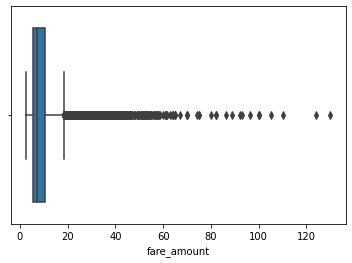

In [108]:
sns.boxplot( x =df2['fare_amount'])


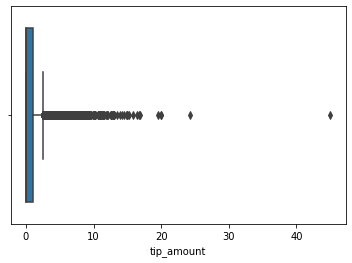

In [109]:
sns.boxplot( x =df2['tip_amount'])


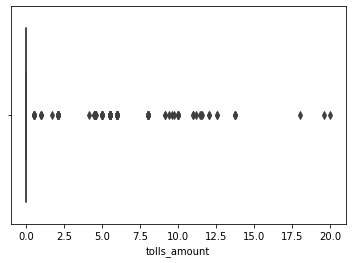

In [110]:
sns.boxplot( x =df2['tolls_amount'])


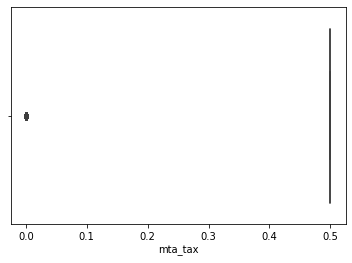

In [111]:
sns.boxplot( x =df2['mta_tax'])


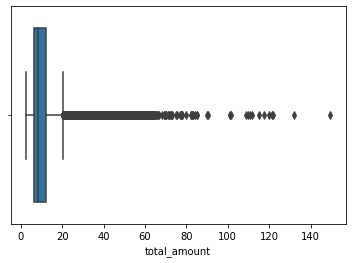

In [112]:
sns.boxplot( x =df2['total_amount'])

===================================================================================================================








## - Data Analyzing :: 

In [ ]:
week_day=pd.DataFrame(df2['weekday'].value_counts())
week_day

,weekday
Friday,7631
Saturday,7605
Sunday,6770
Thursday,6017
Wednesday,5857
Tuesday,5541
Monday,4941


In [64]:
week_day['day_type']=['wd','we','wd','wd','wd','we','wd']
week_day

,weekday,day_type
Friday,7631,wd
Saturday,7605,we
Sunday,6770,wd
Thursday,6017,wd
Wednesday,5857,wd
Tuesday,5541,we
Monday,4941,wd


In [65]:
pie=week_day.groupby('day_type').sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,weekday
day_type,
wd,6243.2
we,6573.0


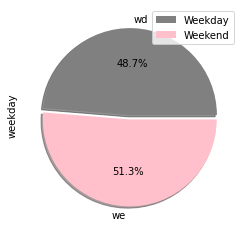

In [66]:
explode=[0,0.05]
colors=['grey','pink']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


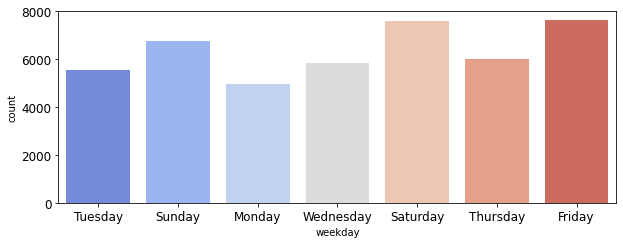

In [71]:
fig = plt.figure(figsize = (10,12))

plt.subplot(3,1,2)
ax2 = sns.countplot(df2.weekday)
plt.tick_params(labelsize=12)
plt.xlabel('Days of the week')
sns.countplot(x ='weekday', data = df2, palette ='coolwarm')

plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


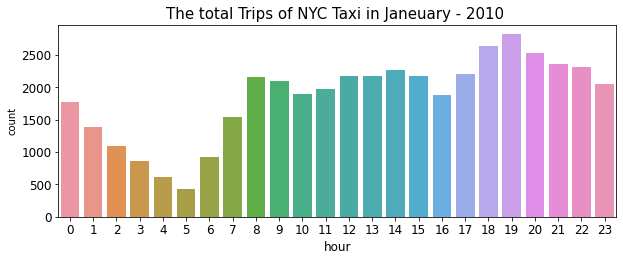

In [69]:
fig = plt.figure(figsize = (10,12))

plt.subplot(3,1,1) 
ax1 = sns.countplot(df2.hour, order = range(24))
plt.tick_params(labelsize=12)
plt.title('The total Trips of NYC Taxi in Janeuary - 2010 ', fontsize=15, color='black')
plt.xlabel('hour', fontsize=12)

plt.show()

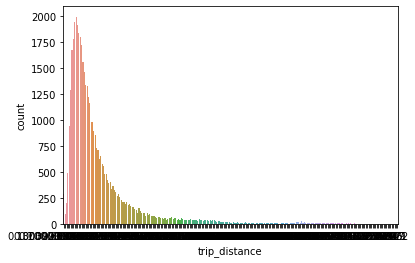

In [68]:
import seaborn as sns

sns.countplot(x = 'trip_distance', data = df2);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


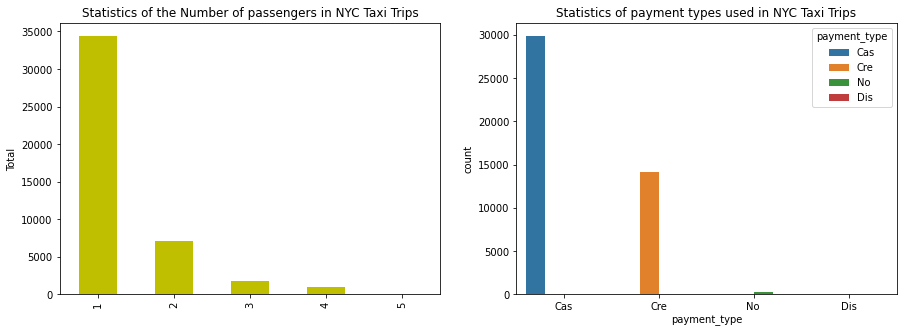

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df2["passenger_count"].value_counts().plot.bar(color = "y", ax = ax[0])
ax[0].set_title("Statistics of the Number of passengers in NYC Taxi Trips")
ax[0].set_ylabel("Total")
sns.countplot("payment_type", hue = "payment_type", data = df2, ax = ax[1] )
ax[1].set_title("Statistics of payment types used in NYC Taxi Trips")
plt.show()

===================================================================================================================

# **- Modeling ::**

**1. Linear Regression Model Test**

Linear Relationship: The relationship between the independent and dependent variables is linear.


In [92]:
# Import the train_test_split function
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  Instantiate model object
lr = LinearRegression()


#Features and targets 
X = df2[['pickup_longitude', 'pickup_latitude', 'rate_code', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour', 'surcharge']]
y = df2.fare_amount

# Fit to training data
lr.fit(X,y)
print(lr)


# Predict
# y_pred_lr = lr.predict(X)
predictions=lr.predict(y_train)


print("First in-sample predictions:", lr.predict(X.head()))
print("Actual target values for Fare amount:", y.head().tolist())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
First in-sample predictions: [8.66815468 9.08999098 9.56783799 8.63591622 9.35526619]
Actual target values for Fare amount: [14.9, 4.9, 5.7, 4.5, 7.3]


In [94]:
df_lr = pd.DataFrame({'Features': y_test, 'Target': predictions})
df_lr.head(10)

,Features,Target
68754,12.1,10.159883
91113,7.7,8.522553
96726,5.3,9.799756
60652,4.9,9.326209
72948,4.1,9.396954
45490,4.1,9.054281
50021,15.3,10.025977
30918,10.5,8.649406
70682,7.3,9.543317
57942,5.7,8.612710


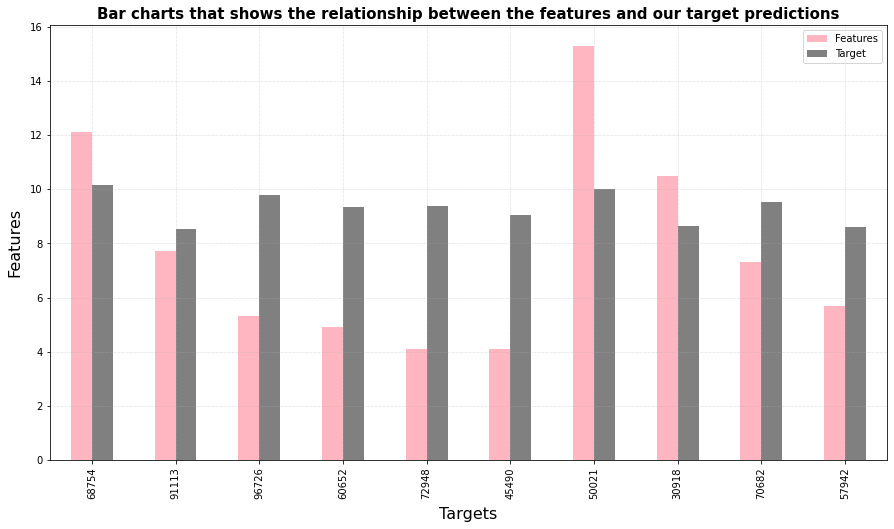

In [95]:
dfx = df_lr.head(10)
dfx.plot(kind='bar',figsize=(15,8), color=('lightpink','gray') )
plt.grid(which='major', linestyle=':', linewidth='0.5')
plt.xlabel("Targets", size=16, labelpad=8, color='Black')
plt.ylabel("Features", size=16, labelpad=8, color='black')
plt.title('Bar charts that shows the relationship between the features and our target predictions', fontsize=15, color='black', weight='bold')

plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

**2. Decision Tree Model test 
**bold text**

There are a number of non-linear regressors to choose from, but I will implement a Decision Tree Regressor first for couple of primary reasons:

it is the easiest to interpret


does not require feature scaling


In [80]:
# Import the train_test_split function
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [82]:
#Features and targets 
X = df2[['pickup_longitude', 'pickup_latitude', 'rate_code', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour', 'surcharge']]
y = df2.fare_amount

In [83]:
# Specify Model
taxi_model = DecisionTreeRegressor()
# Fit Model
taxi_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [84]:
print("First in-sample predictions:", taxi_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

First in-sample predictions: [14.9  4.9  5.7  4.5  7.3]
Actual target values for those homes: [14.9, 4.9, 5.7, 4.5, 7.3]


In [85]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [86]:
# Predict with all validation observations

val_predictions = taxi_model.predict(val_X)


In [87]:
# Specify the model
taxi_model = DecisionTreeRegressor(random_state =1)

# Fit taxi_model with the training data.
taxi_model.fit(train_X , train_y )

print(val_predictions)

[18.9  4.5  8.5 ... 15.7  4.5  4.1]


In [88]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_predictions , val_y)

#  see the validation_mae


print("Validation MAE: {:}".format(val_mae))


Validation MAE: 0.017135515282661645


In [89]:
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,val_predictions))
print('MAE:',metrics.mean_absolute_error(y_test,val_predictions))
print('MSE:',metrics.mean_squared_error(y_test,val_predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,val_predictions)))


Decision Tree Regression Performance Metrics
R^2= -0.9518071088858819
MAE: 5.817088630421062
MSE: 90.70254438383475
RMSE: 9.523788342032532


In [90]:
df_dt = pd.DataFrame({'Features': y_test, 'Target': val_predictions})
df_dt.head(10)

,Features,Target
68754,12.1,18.9
91113,7.7,4.5
96726,5.3,8.5
60652,4.9,6.5
72948,4.1,12.1
45490,4.1,23.7
50021,15.3,7.3
30918,10.5,6.1
70682,7.3,12.9
57942,5.7,18.3


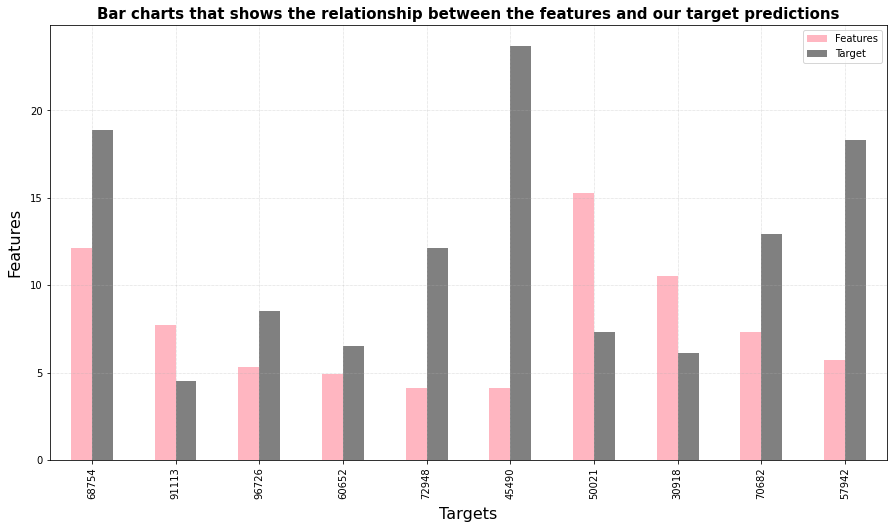

In [91]:
dfy = df_dt.head(10)
dfy.plot(kind='bar',figsize=(15,8), color=('lightpink','gray') )
plt.grid(which='major', linestyle=':', linewidth='0.5')
plt.xlabel("Targets", size=16, labelpad=8, color='Black')
plt.ylabel("Features", size=16, labelpad=8, color='black')
plt.title('Bar charts that shows the relationship between the features and our target predictions', fontsize=15, color='black', weight='bold')

plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()